## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [179]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [180]:
X = np.linspace(0,20,50)
print(X)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [181]:
def y(x):
    return -2*x +1
print(y(X))

[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [182]:
def GDB(alpha,x_in,y_op,max_itr):
    itr = 0
    t0 = 0
    t1 = 0
    m = len(x_in)
    cost_t = []
    theta_z = []
    theta_o = []
    
    y_pred = t0 + t1 *  x_in
    cost = (1/(2*m))*sum(((y_pred - y_op)**2))
    G_0 = (1/m) * sum((y_pred - y_op))
    G_1 = (1/m) * np.dot(y_pred - y_op , x_in)
    norm = np.linalg.norm([G_0,G_1])
    while norm >= 0.001 :
        if itr>=max_itr:
                break
        
        y_pred = t0 + t1 *  x_in
        cost =(1/(2*m))*sum(((y_pred - y_op)**2))
        cost_t.append(cost)
        G0 = (1/m) * sum((y_pred - y_op))
        G1 = (1/m) * np.dot(y_pred - y_op , x_in)
        norm = np.linalg.norm([G0,G1])
        t0_n = t0 - alpha * G0
        t1_n = t1 - alpha * G1
        t0 = t0_n
        theta_z.append(t0)
        t1 = t1_n
        theta_o.append(t1)
        itr += 1
        
        if itr>1:
            if abs(cost_t[-1]-cost_t[-2]) < 0.0001:
                break
        
        
           
    return t0 , t1 ,cost_t , itr , theta_z ,theta_o
        
    
        
    
t0_B,t1_B,cost_TB , IB, TZ ,TO = GDB(0.001,X,y(X),200) 
print("theta0 = ",t0_B,"\n","theta1 = ",t1_B,"\n","no of itr:",IB)
#print(len(cost_TB))


        
        
    

theta0 =  -0.1264141267847473 
 theta1 =  -1.915569709396318 
 no of itr: 55


#### Try your function with any input parameterss of your choice.

In [183]:
y_Pred = t0_B + t1_B *  X
print(y_Pred)

[ -0.12641413  -0.90827931  -1.6901445   -2.47200969  -3.25387488
  -4.03574006  -4.81760525  -5.59947044  -6.38133563  -7.16320081
  -7.945066    -8.72693119  -9.50879638 -10.29066156 -11.07252675
 -11.85439194 -12.63625713 -13.41812231 -14.1999875  -14.98185269
 -15.76371788 -16.54558306 -17.32744825 -18.10931344 -18.89117863
 -19.67304381 -20.454909   -21.23677419 -22.01863938 -22.80050456
 -23.58236975 -24.36423494 -25.14610013 -25.92796531 -26.7098305
 -27.49169569 -28.27356088 -29.05542606 -29.83729125 -30.61915644
 -31.40102163 -32.18288681 -32.964752   -33.74661719 -34.52848238
 -35.31034756 -36.09221275 -36.87407794 -37.65594313 -38.43780831]


#### Calculate r2 score

In [184]:
from sklearn.metrics import r2_score
print(r2_score(y(X),y_Pred))

0.9976443888155676


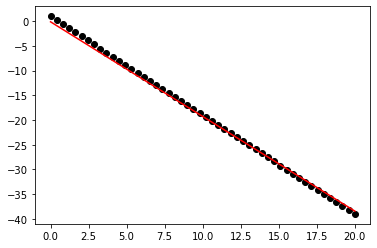

In [185]:
fig , ab = plt.subplots()
ab.scatter(X,y(X),color="black")
ab.plot(X,y_Pred,color="red")
plt.show()


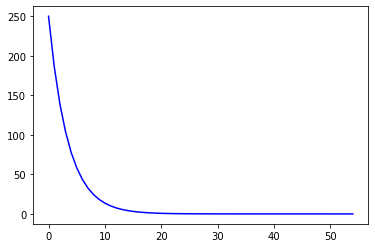

In [186]:
itra = np.arange(0,IB)
plt.plot(itra,cost_TB,'blue')
plt.show()

#### Plot loss vs. epochs

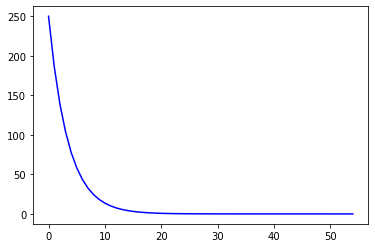

In [187]:
itra = np.arange(0,IB)
plt.plot(itra,cost_TB,'blue')
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

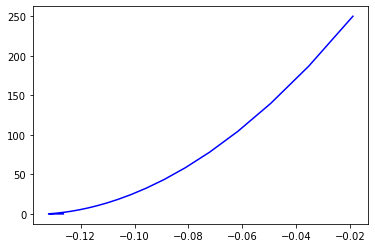

In [188]:
plt.plot(TZ,cost_TB,'blue')
plt.show()

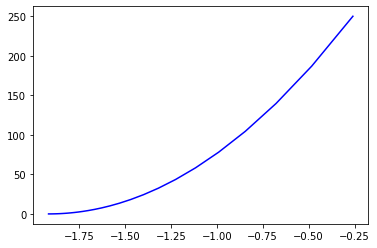

In [189]:
plt.plot(TO,cost_TB,'blue')
plt.show()

#### Plot all regression lines till converge

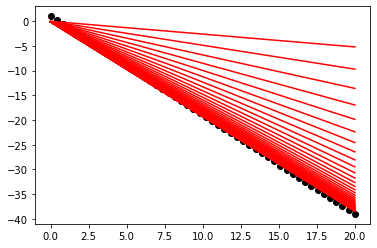

In [190]:
for i in range (len(TZ)):
    y_PredI = TZ[i] + TO[i] *  X
    plt.plot(X,y_PredI,"red")
    
plt.scatter(X,y(X),color="black")
plt.show()

    

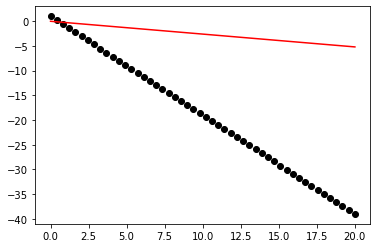

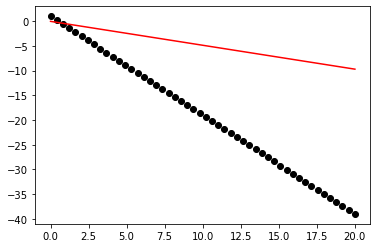

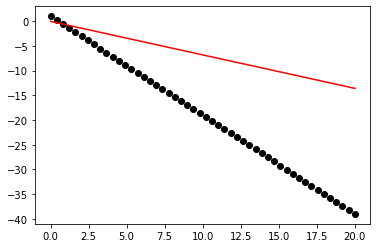

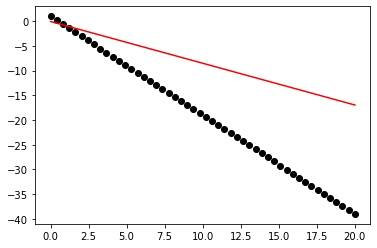

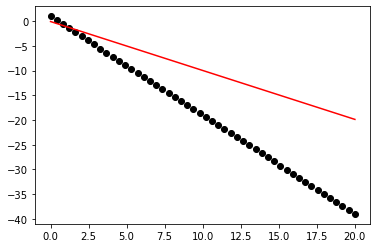

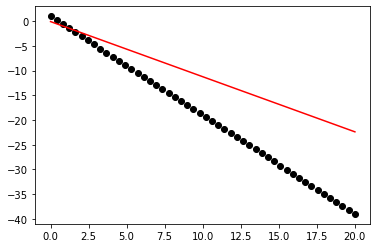

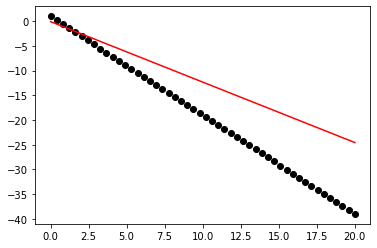

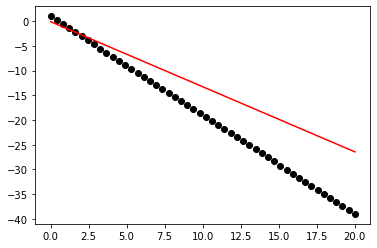

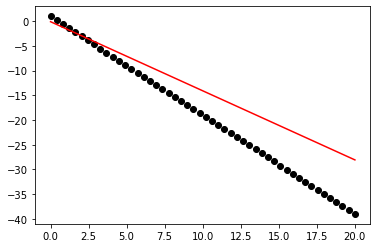

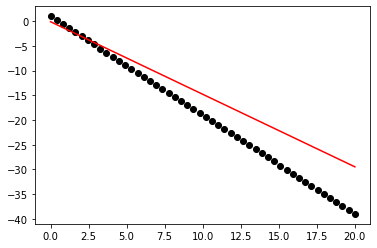

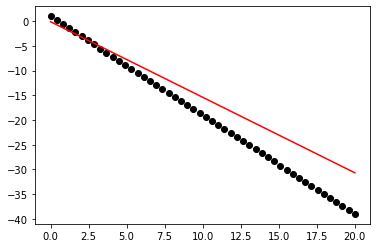

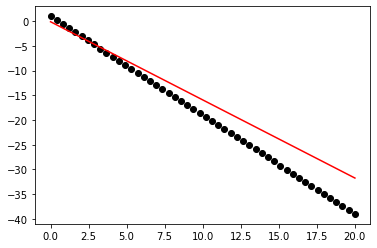

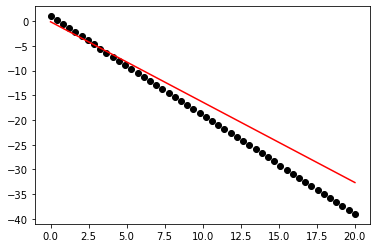

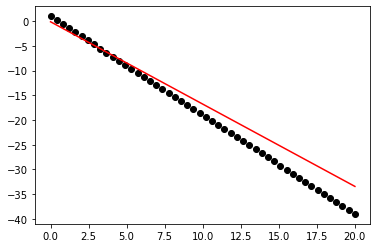

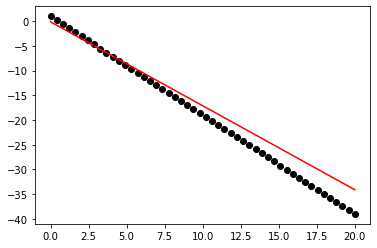

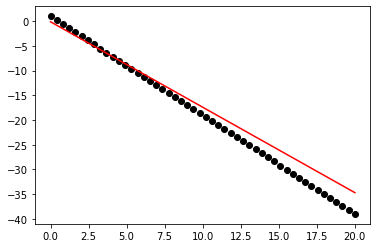

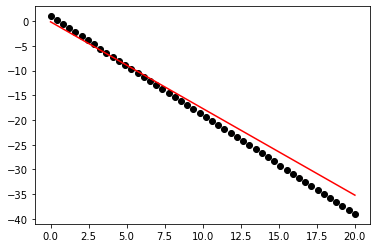

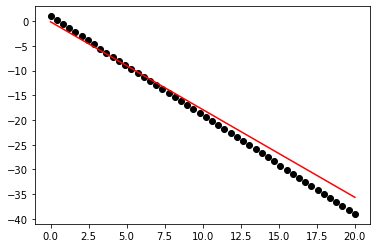

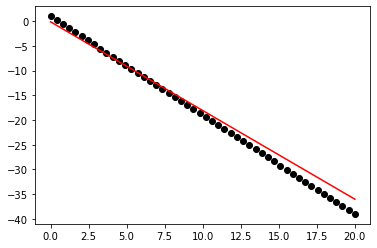

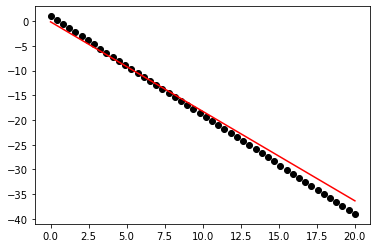

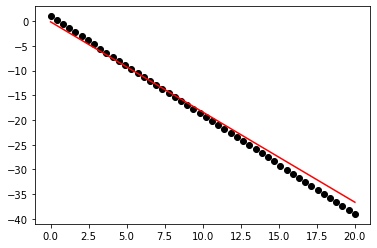

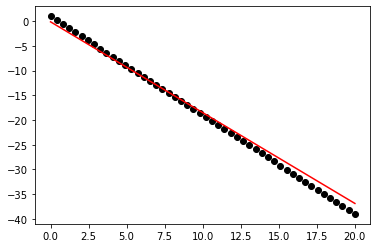

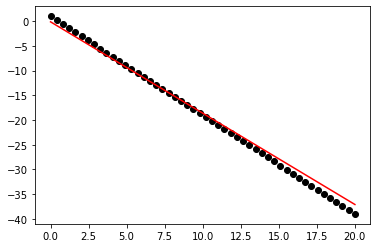

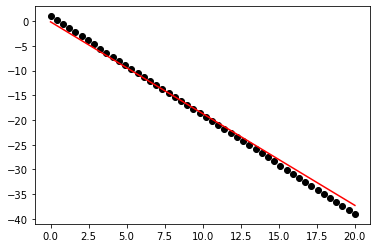

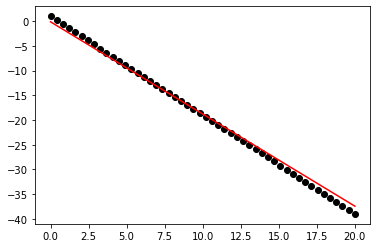

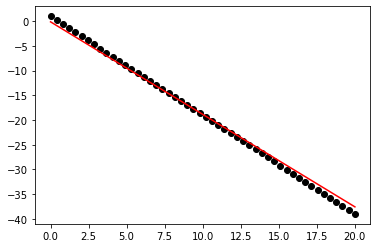

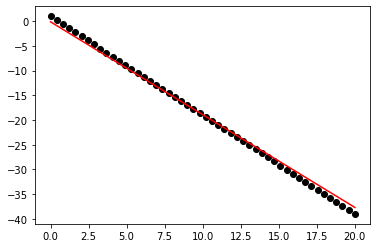

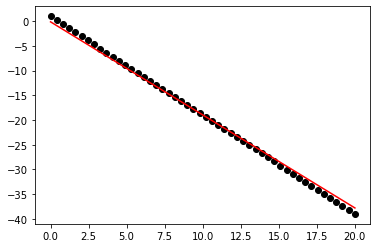

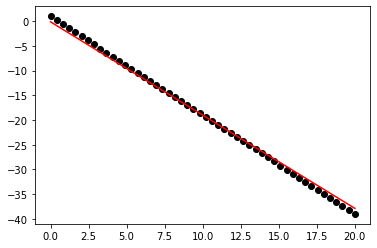

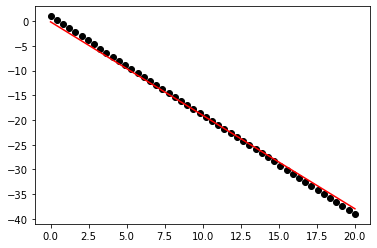

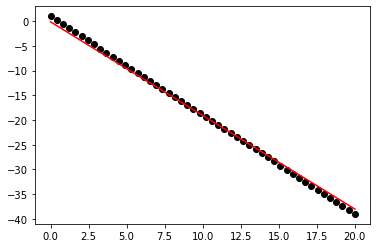

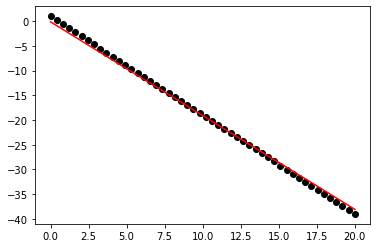

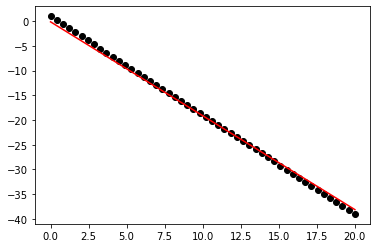

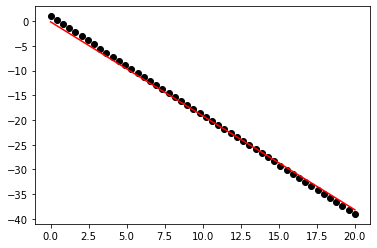

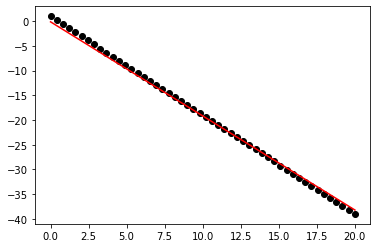

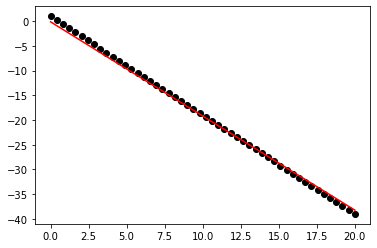

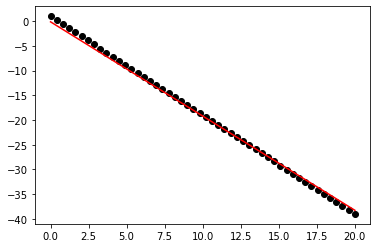

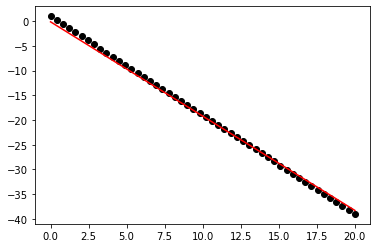

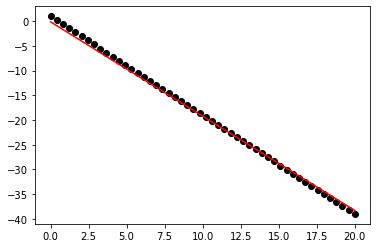

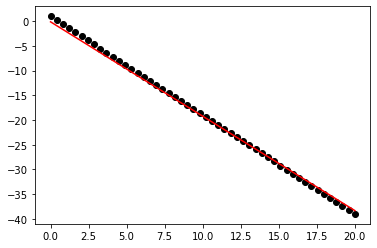

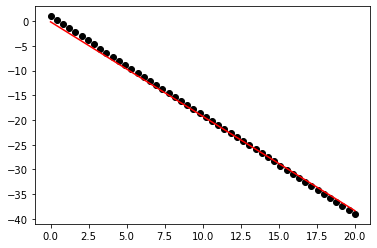

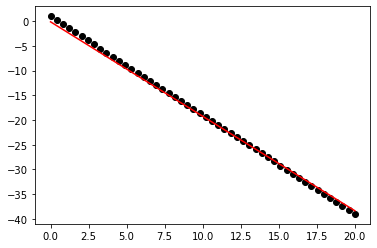

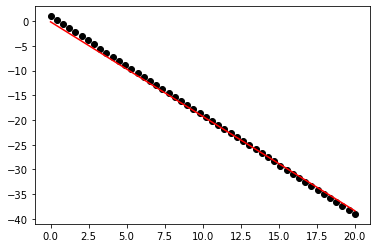

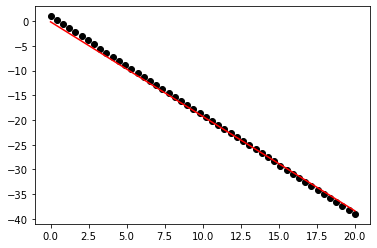

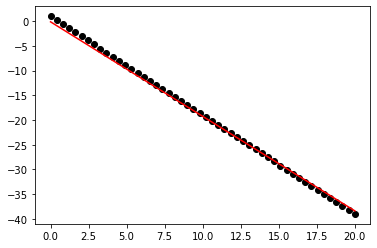

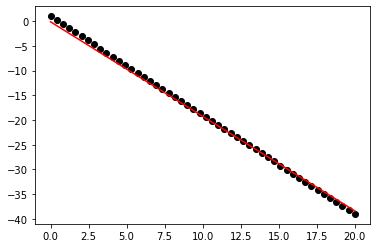

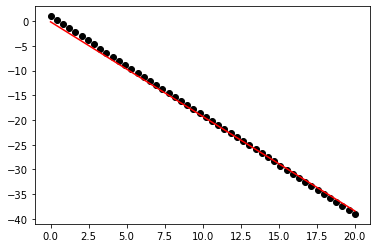

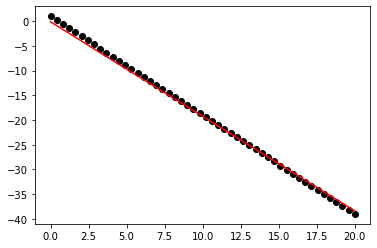

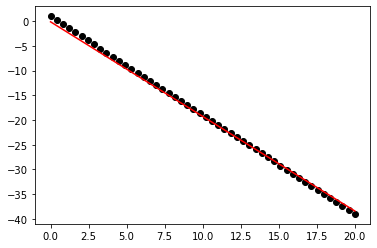

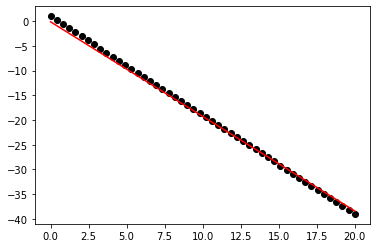

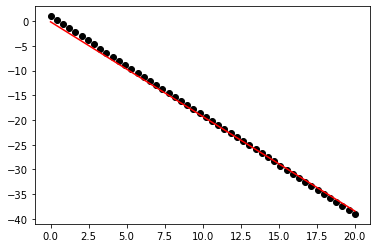

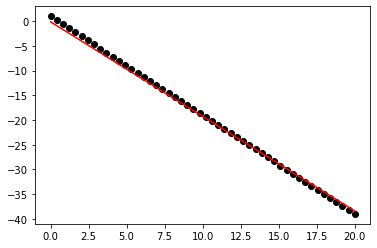

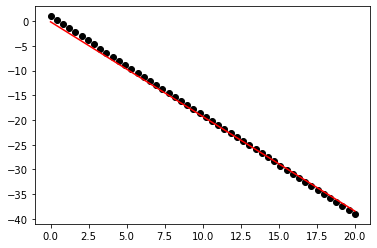

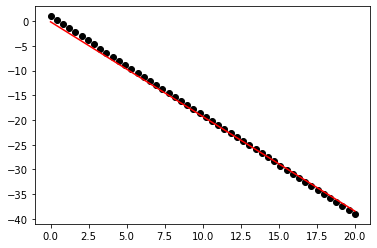

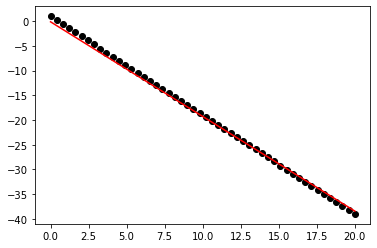

In [191]:
for i in range (len(TZ)):
    y_PredI = TZ[i] + TO[i] *  X
    fig , abI = plt.subplots()
    abI.plot(X,y_PredI,color="red")
    abI.scatter(X,y(X),color="black")
    plt.show()

#### Plot the best regression line

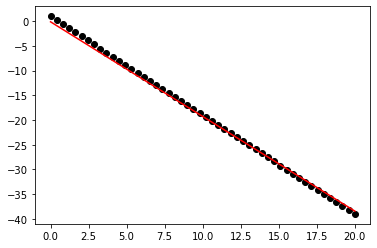

In [192]:
fig , ab = plt.subplots()
ab.scatter(X,y(X),color="black")
ab.plot(X,y_Pred,color="red")
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [193]:
t0_B1 , t1_B1 , cost_TB1 , IB1 , TZ_1 , TO_1 = GDB(0.0001,X,y(X),50000) 
print("theta0 = ",t0_B1,"\n","theta1 = ",t1_B1,"\n","no of itr:",IB1)

theta0 =  -0.12991349416896844 
 theta1 =  -1.9090548660618039 
 no of itr: 413


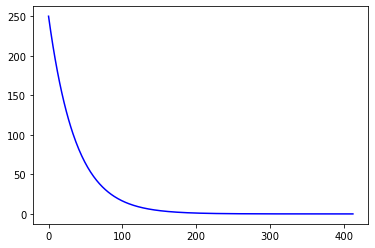

In [194]:
itra1 = np.arange(0,IB1)
plt.plot(itra1,cost_TB1,'blue')
plt.show()

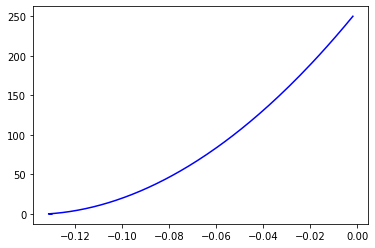

In [195]:
plt.plot(TZ_1,cost_TB1,'blue')
plt.show()

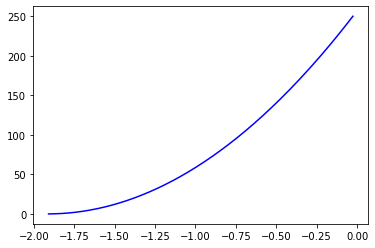

In [196]:
plt.plot(TO_1,cost_TB1,'blue')
plt.show()

In [197]:
t0_B2 , t1_B2 , cost_TB2 , IB2 , TZ_2 , TO_2 = GDB(0.001,X,y(X),50000) 
print("theta0 = ",t0_B2,"\n","theta1 = ",t1_B2,"\n","no of itr:",IB2)

theta0 =  -0.1264141267847473 
 theta1 =  -1.915569709396318 
 no of itr: 55


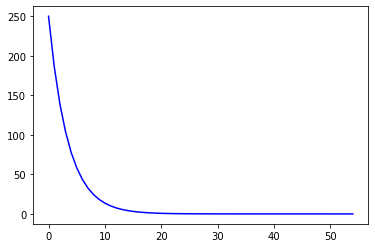

In [198]:
itra2 = np.arange(0,IB2)
plt.plot(itra2,cost_TB2,'blue')
plt.show()

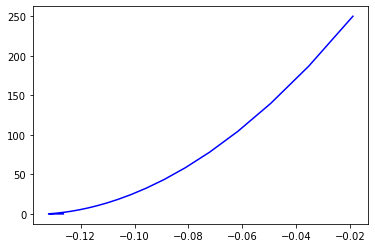

In [199]:
plt.plot(TZ_2,cost_TB2,'blue')
plt.show()

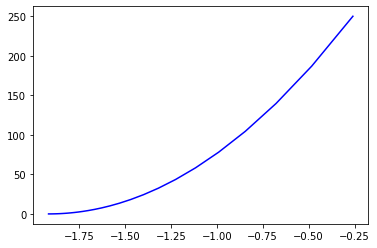

In [200]:
plt.plot(TO_2,cost_TB2,'blue')
plt.show()

In [201]:
t0_B3 , t1_B3 , cost_TB3 , IB3 , TZ_3 , TO_3 = GDB(0.01,X,y(X),50000) 
print("theta0 = ",t0_B3,"\n","theta1 = ",t1_B3,"\n","no of itr:",IB3)

theta0 =  0.6129551507774741 
 theta1 =  -1.971210099404652 
 no of itr: 422


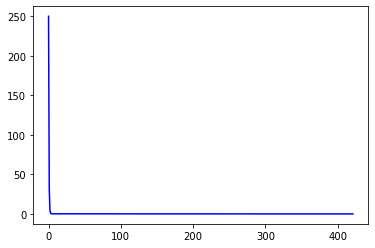

In [202]:
itra3 = np.arange(0,IB3)
plt.plot(itra3,cost_TB3,'blue')
plt.show()

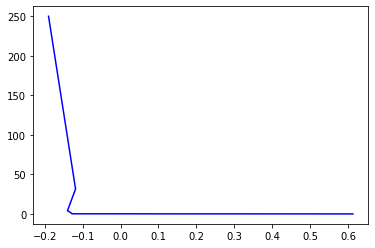

In [203]:
plt.plot(TZ_3,cost_TB3,'blue')
plt.show()

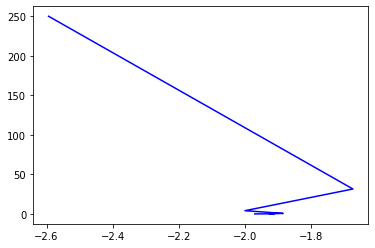

In [204]:
plt.plot(TO_3,cost_TB3,'blue')
plt.show()

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [205]:
def GDMB(alphaMB,Xin_MB,Yop_MB,max_itrsMB):
    t0 = 0
    t1 = 0
    m = len(Xin_MB)
    b = m//4
    nb = m//b
    itrMB = 0
    cost_allB = []
    T0_MB = []
    T1_MB = []
    
    
    ypred_MB = t0 + t1 *  Xin_MB
    cost_MB = (1/(2*b))*sum(((ypred_MB - Yop_MB)**2))
    G0_MB = (1/b) * sum((ypred_MB - Yop_MB))
    G1_MB = (1/b) * np.dot(ypred_MB - Yop_MB , Xin_MB)
    
    for j in range (max_itrsMB):
        for i in range (nb):
            ypred_MB = t0 + t1 *  Xin_MB
            cost_MB =(1/(2*b))*sum(((ypred_MB - Yop_MB)**2))
            cost_allB.append(cost_MB)
            G0_MB = (1/b) * sum((ypred_MB - Yop_MB))
            G1_MB = (1/b) * np.dot(ypred_MB - Yop_MB , Xin_MB)
            t0_MB = t0 - alphaMB * G0_MB
            t1_MB = t1 - alphaMB * G1_MB
            t0 = t0_MB
            T0_MB.append(t0)
            t1 = t1_MB
            T1_MB.append(t1)
            itrMB += 1
            
        
           
    return t0 , t1 ,cost_allB , itrMB , T0_MB ,T1_MB
        
    
        
    
t0_MB,t1_MB,cost_MB , IMB, TZ_MB ,TO_MB = GDMB(0.001,X,y(X),50) 
print("theta0 = ",t0_MB,"\n","theta1 = ",t1_MB,"\n","no of itr:",IMB)
print(len(cost_MB))
print(len(TZ_MB))
            
    
    
    

theta0 =  0.07726154499270549 
 theta1 =  -1.9313631263960018 
 no of itr: 200
200
200


In [206]:
yPred_MB = t0_MB + t1_MB * X
print(yPred_MB)

[  0.07726154  -0.71104994  -1.49936142  -2.2876729   -3.07598438
  -3.86429586  -4.65260734  -5.44091882  -6.2292303   -7.01754178
  -7.80585326  -8.59416474  -9.38247622 -10.1707877  -10.95909918
 -11.74741066 -12.53572214 -13.32403362 -14.1123451  -14.90065658
 -15.68896806 -16.47727954 -17.26559102 -18.0539025  -18.84221398
 -19.63052546 -20.41883694 -21.20714842 -21.9954599  -22.78377138
 -23.57208286 -24.36039434 -25.14870582 -25.9370173  -26.72532878
 -27.51364026 -28.30195174 -29.09026322 -29.8785747  -30.66688618
 -31.45519766 -32.24350914 -33.03182062 -33.8201321  -34.60844358
 -35.39675506 -36.18506654 -36.97337802 -37.7616895  -38.55000098]


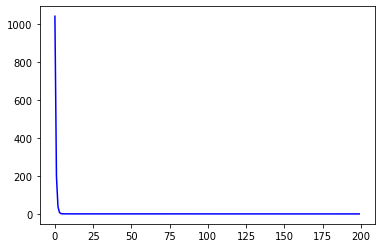

In [207]:
itra_MB = np.arange(0,IMB)
plt.plot(itra_MB,cost_MB,'blue')
plt.show()

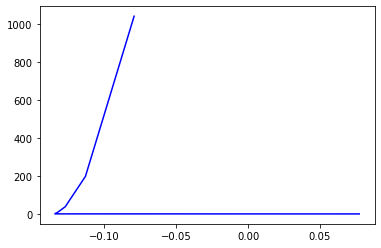

In [208]:
plt.plot(TZ_MB,cost_MB,'blue')
plt.show()

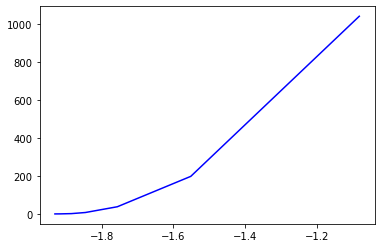

In [209]:
plt.plot(TO_MB,cost_MB,'blue')
plt.show()

In [210]:
from sklearn.metrics import r2_score
print(r2_score(y(X),yPred_MB))

0.9984196476074981


In [211]:
# mini-Batch with stop condition:
def GD_MB(alphaMB,X_MB,Y_MB,maxitr_MB,Num_B):
    t0 = 0
    t1 = 0
    m = len(X_MB)
    b = m//Num_B
    itr = 0
    cost_allB = []
    T0_MB = []
    T1_MB = []
    
    
    ypred_MB = t0 + t1 *  X_MB
    cost_MB = (1/(2*b))*sum(((ypred_MB - Y_MB)**2))
    G0_MB = (1/b) * sum((ypred_MB - Y_MB))
    G1_MB = (1/b) * np.dot(ypred_MB - Y_MB , X_MB)
    norm  = np.linalg.norm([G0_MB,G1_MB])
    
    while norm >= 0.001 :
        if itr>=maxitr_MB:
            break
        for i in range (Num_B):
            ypred_MB = t0 + t1 *  X_MB
            #cost_MB =(1/(2*b))*sum(((ypred_MB - Y_MB)**2))
            #cost_allB.append(cost_MB)
            G0_MB = (1/b) * sum((ypred_MB - Y_MB))
            G1_MB = (1/b) * np.dot(ypred_MB - Y_MB , X_MB)
            t0_MB = t0 - alphaMB * G0_MB
            t1_MB = t1 - alphaMB * G1_MB
            t0 = t0_MB
            #T0_MB.append(t0)
            t1 = t1_MB
            #T1_MB.append(t1)
            
        norm = np.linalg.norm([G0_MB,G1_MB])
        cost_MB =(1/(2*b))*sum(((ypred_MB - Y_MB)**2))
        cost_allB.append(cost_MB)
        T0_MB.append(t0)
        T1_MB.append(t1)
        t1 = t1_MB   
        itr += 1
        
        if itr>1:
            if abs(cost_allB[-1]-cost_allB[-2]) < 0.0001:
                break
            
        
           
    return t0 , t1 ,cost_allB , itr , T0_MB ,T1_MB
        
    
        
    
t0S_MB,t1S_MB,costS_MB , IS_MB, TZS_MB ,TOS_MB = GD_MB(0.001,X,y(X),500,4) 
print("theta0 = ",t0S_MB,"\n","theta1 = ",t1S_MB,"\n","no of itr:",IS_MB)
print(len(costS_MB))
print(len(TZS_MB))

theta0 =  0.8529836170205646 
 theta1 =  -1.9890643498799487 
 no of itr: 480
480
480


In [212]:
ypred_MB = t0S_MB + t1S_MB * X
print(ypred_MB)

[  0.85298362   0.04112062  -0.77074238  -1.58260538  -2.39446838
  -3.20633138  -4.01819438  -4.83005738  -5.64192038  -6.45378338
  -7.26564638  -8.07750938  -8.88937238  -9.70123538 -10.51309838
 -11.32496138 -12.13682438 -12.94868738 -13.76055038 -14.57241338
 -15.38427638 -16.19613938 -17.00800238 -17.81986538 -18.63172838
 -19.44359138 -20.25545438 -21.06731738 -21.87918038 -22.69104338
 -23.50290638 -24.31476938 -25.12663238 -25.93849538 -26.75035838
 -27.56222138 -28.37408438 -29.18594738 -29.99781038 -30.80967338
 -31.62153638 -32.43339938 -33.24526238 -34.05712538 -34.86898838
 -35.68085138 -36.49271438 -37.30457738 -38.11644038 -38.92830338]


In [213]:
from sklearn.metrics import r2_score
print(r2_score(y(X),ypred_MB))

0.9999598830261593


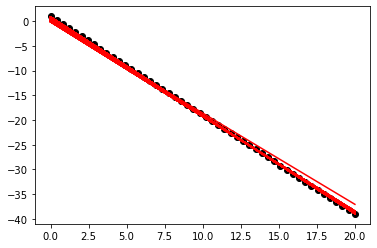

In [214]:
for i in range (len(TZS_MB)):
    yMB_PredI = TZS_MB[i] + TOS_MB[i] *  X
    plt.plot(X,yMB_PredI,"red")
    
plt.scatter(X,y(X),color="black")
plt.show()

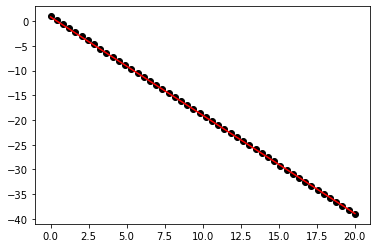

In [215]:
fig , MB = plt.subplots()
MB.scatter(X,y(X),color="black")
MB.plot(X,ypred_MB,color="red")
plt.show()

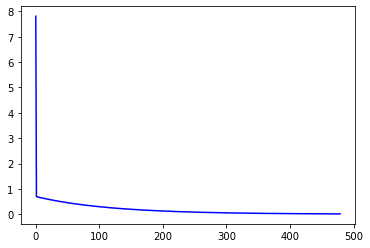

In [216]:
itr_MB = np.arange(0,IS_MB)
plt.plot(itr_MB,costS_MB,'blue')
plt.show()

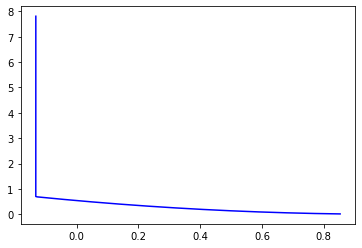

In [217]:
plt.plot(TZS_MB,costS_MB,'blue')
plt.show()

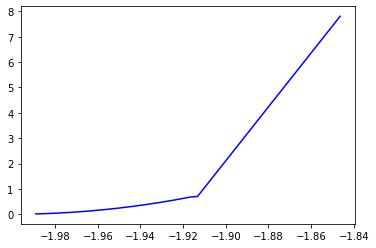

In [218]:
plt.plot(TOS_MB,costS_MB,'blue')
plt.show()

theta0 =  0.6563267643786218 
 theta1 =  -1.97443624863967 
 no of itr: 500
Accuracy is:  0.9997807759880364


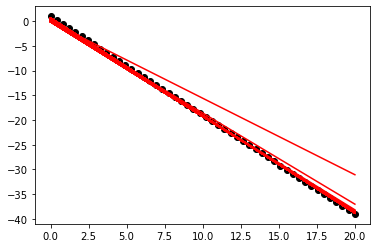

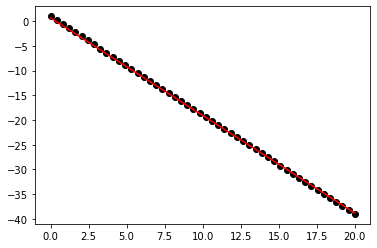

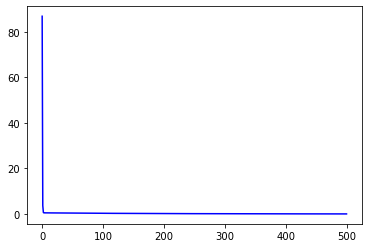

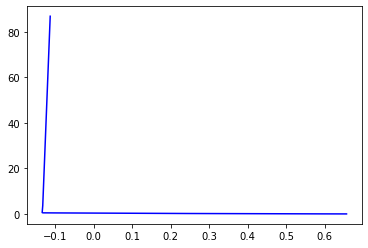

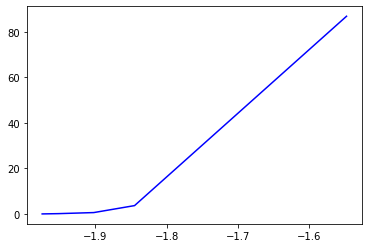

In [219]:
t0S_MB3,t1S_MB3,costS_MB3 , IS_MB3, TZS_MB3 ,TOS_MB3 = GD_MB(0.001,X,y(X),500,3) 
print("theta0 = ",t0S_MB3,"\n","theta1 = ",t1S_MB3,"\n","no of itr:",IS_MB3)

ypred_MB3 = t0S_MB3 + t1S_MB3 * X

from sklearn.metrics import r2_score
print("Accuracy is: ",r2_score(y(X),ypred_MB3))

for i in range (len(TZS_MB3)):
    yMB_PredI3 = TZS_MB3[i] + TOS_MB3[i] *  X
    plt.plot(X,yMB_PredI3,"red")    
plt.scatter(X,y(X),color="black")
plt.show()

fig , MB3 = plt.subplots()
MB3.scatter(X,y(X),color="black")
MB3.plot(X,ypred_MB3,color="red")
plt.show()

itr_MB3 = np.arange(0,IS_MB3)
plt.plot(itr_MB3,costS_MB3,'blue')
plt.show()

plt.plot(TZS_MB3,costS_MB3,'blue')
plt.show()

plt.plot(TOS_MB3,costS_MB3,'blue')
plt.show()





theta0 =  0.8905409121951189 
 theta1 =  -1.9918580075061323 
 no of itr: 366
Accuracy is:  0.9999777617633725


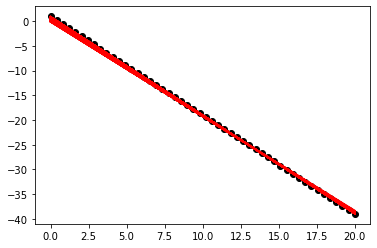

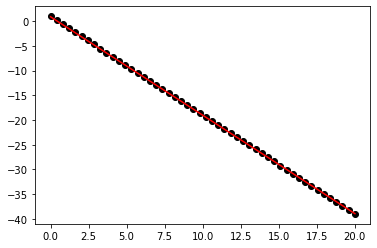

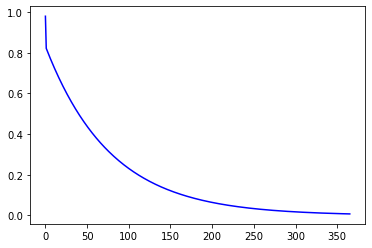

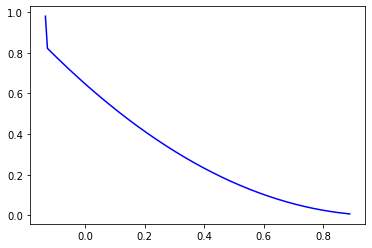

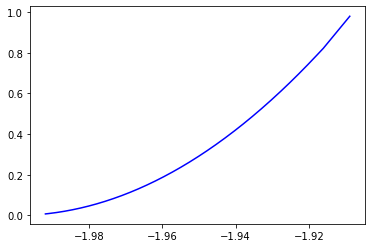

In [220]:
t0S_MB5,t1S_MB5,costS_MB5 , IS_MB5, TZS_MB5 ,TOS_MB5 = GD_MB(0.001,X,y(X),500,5) 
print("theta0 = ",t0S_MB5,"\n","theta1 = ",t1S_MB5,"\n","no of itr:",IS_MB5)

ypred_MB5 = t0S_MB5 + t1S_MB5 * X

from sklearn.metrics import r2_score
print("Accuracy is: ",r2_score(y(X),ypred_MB5))

for i in range (len(TZS_MB5)):
    yMB_PredI5 = TZS_MB5[i] + TOS_MB5[i] *  X
    plt.plot(X,yMB_PredI5,"red")    
plt.scatter(X,y(X),color="black")
plt.show()

fig , MB5 = plt.subplots()
MB5.scatter(X,y(X),color="black")
MB5.plot(X,ypred_MB5,color="red")
plt.show()

itr_MB5 = np.arange(0,IS_MB5)
plt.plot(itr_MB5,costS_MB5,'blue')
plt.show()

plt.plot(TZS_MB5,costS_MB5,'blue')
plt.show()

plt.plot(TOS_MB5,costS_MB5,'blue')
plt.show()


theta0 =  0.9361539241755037 
 theta1 =  -1.9952508806664586 
 no of itr: 225
Accuracy is:  0.9999924340212595


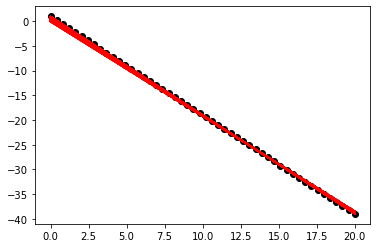

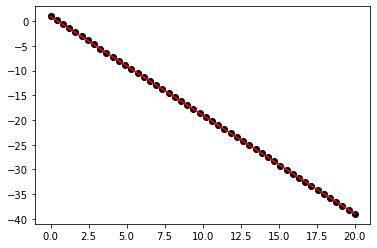

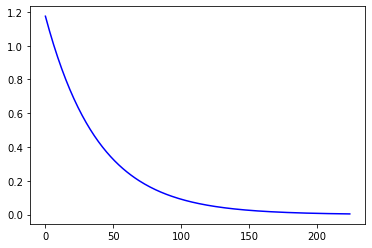

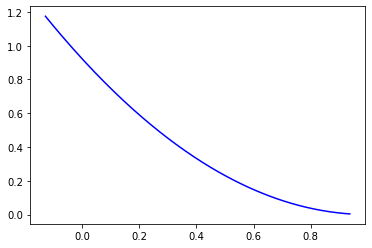

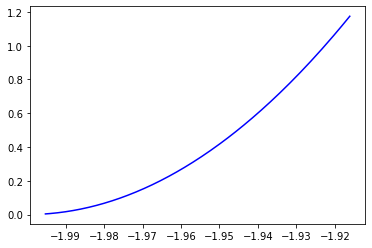

In [221]:
t0S_MB7,t1S_MB7,costS_MB7 , IS_MB7, TZS_MB7 ,TOS_MB7 = GD_MB(0.001,X,y(X),500,7) 
print("theta0 = ",t0S_MB7,"\n","theta1 = ",t1S_MB7,"\n","no of itr:",IS_MB7)

ypred_MB7 = t0S_MB7 + t1S_MB7 * X

from sklearn.metrics import r2_score
print("Accuracy is: ",r2_score(y(X),ypred_MB7))

for i in range (len(TZS_MB7)):
    yMB_PredI7 = TZS_MB7[i] + TOS_MB7[i] *  X
    plt.plot(X,yMB_PredI7,"red")    
plt.scatter(X,y(X),color="black")
plt.show()

fig , MB7 = plt.subplots()
MB7.scatter(X,y(X),color="black")
MB7.plot(X,ypred_MB7,color="red")
plt.show()

itr_MB7 = np.arange(0,IS_MB7)
plt.plot(itr_MB7,costS_MB7,'blue')
plt.show()

plt.plot(TZS_MB7,costS_MB7,'blue')
plt.show()

plt.plot(TOS_MB7,costS_MB7,'blue')
plt.show()


theta0 =  0.9623017603460049 
 theta1 =  -1.9971958583754872 
 no of itr: 133
Accuracy is:  0.999997362218367


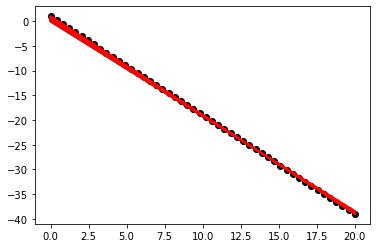

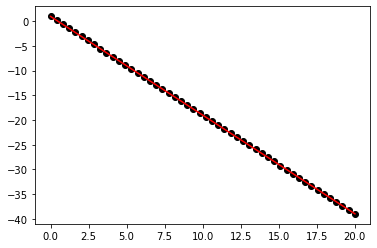

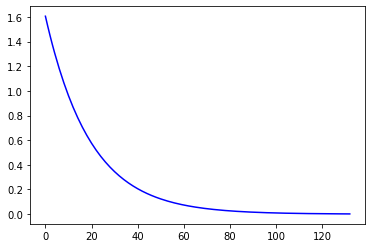

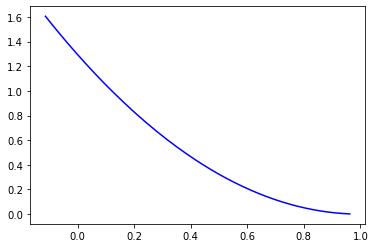

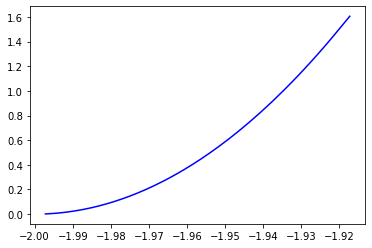

In [222]:
t0S_MB10 ,t1S_MB10 ,costS_MB10 , IS_MB10 , TZS_MB10 ,TOS_MB10 = GD_MB(0.001,X,y(X),500,10) 
print("theta0 = ",t0S_MB10,"\n","theta1 = ",t1S_MB10,"\n","no of itr:",IS_MB10)

ypred_MB10 = t0S_MB10 + t1S_MB10 * X

from sklearn.metrics import r2_score
print("Accuracy is: ",r2_score(y(X),ypred_MB10))

for i in range (len(TZS_MB10)):
    yMB_PredI10 = TZS_MB10[i] + TOS_MB10[i] *  X
    plt.plot(X,yMB_PredI10,"red")    
plt.scatter(X,y(X),color="black")
plt.show()

fig , MB10 = plt.subplots()
MB10.scatter(X,y(X),color="black")
MB10.plot(X,ypred_MB10,color="red")
plt.show()

itr_MB10 = np.arange(0,IS_MB10)
plt.plot(itr_MB10,costS_MB10,'blue')
plt.show()

plt.plot(TZS_MB10,costS_MB10,'blue')
plt.show()

plt.plot(TOS_MB10,costS_MB10,'blue')
plt.show()


## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [223]:
# Stochastic GD with Stop Condition:
def S_GD(x_in,y_op,alpha,max_itr):
    t0 = 0
    t1 = 0
    m = len(x_in)
    itr = 0
    cost_all = []
    cost_allE = []
    T0_SST = []
    T1_SST = []
    
    h = t0 + t1 *  x_in
    h_i =0
    G_0 = h[0] - y_op[0]
    G_1 = h[0] - y_op[0] * x_in[0]
    norm = np.linalg.norm([G_0,G_1])
    
    
    while norm >= 0.0001 :
        if itr>=max_itr:
                break
        
        for i in range(m):
            h_i = t0 + t1*x_in[i]
            cost = 0.5*((h_i - y_op[i])**2)
            cost_all.append(cost)
            GI_0= (h_i - y_op[i])
            GI_1 =((h_i - y_op[i]) * x_in[i])
            #norm = np.linalg.norm([GI_0,GI_1])             
            t0_n = t0 - alpha*GI_0
            t1_n = t1 - alpha*GI_1
            t0 = t0_n
            t1 = t1_n
            #T0_SST.append(t0)
            #T1_SST.append(t1)
            
        norm = np.linalg.norm([GI_0,GI_1])    
        h = t0 + t1*x_in
        cost_E = 0.5*((h - y_op)**2)
        cost_allE.append(cost)   
        T0_SST.append(t0)
        T1_SST.append(t1)
        
        
        itr += 1
        
        if itr>1:
            if abs(cost_allE[-1] - cost_allE[-2]) < 0.0001:
                break
    
 
    return t0 , t1 , cost_allE , itr,T0_SST,T1_SST

t0_SGD, t1_SGD, cost_SGD, I_SGD ,T0_SGD,T1_SGD = S_GD(X,y(X),0.001,500)
print("theta0 = ",t0_SGD,"\n","theta1 = ",t1_SGD,"\n","no of itr:",I_SGD)
print(len(cost_SGD))


theta0 =  -0.20825880506576852 
 theta1 =  -1.9372029881208486 
 no of itr: 3
3


In [224]:
y_SGD = t0_SGD + t1_SGD *  X
print(y_SGD)

[ -0.20825881  -0.9989539   -1.789649    -2.5803441   -3.37103919
  -4.16173429  -4.95242939  -5.74312449  -6.53381958  -7.32451468
  -8.11520978  -8.90590487  -9.69659997 -10.48729507 -11.27799017
 -12.06868526 -12.85938036 -13.65007546 -14.44077055 -15.23146565
 -16.02216075 -16.81285585 -17.60355094 -18.39424604 -19.18494114
 -19.97563623 -20.76633133 -21.55702643 -22.34772153 -23.13841662
 -23.92911172 -24.71980682 -25.51050192 -26.30119701 -27.09189211
 -27.88258721 -28.6732823  -29.4639774  -30.2546725  -31.0453676
 -31.83606269 -32.62675779 -33.41745289 -34.20814798 -34.99884308
 -35.78953818 -36.58023328 -37.37092837 -38.16162347 -38.95231857]


In [225]:
from sklearn.metrics import r2_score
print(r2_score(y(X),y_SGD))

0.9965876613230746


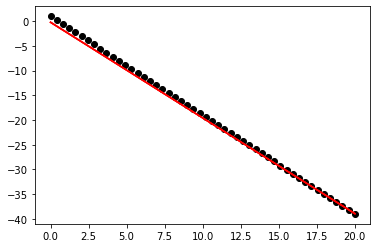

In [226]:
for i in range (len(T0_SGD)):
    y_SGDI = T0_SGD[i] + T1_SGD[i] *  X
    plt.plot(X,y_SGDI,"red")    
plt.scatter(X,y(X),color="black")
plt.show()

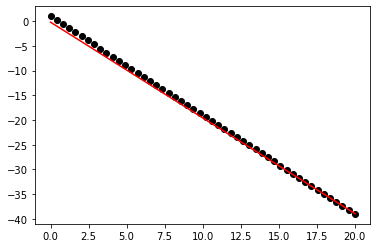

In [227]:
fig , SGD = plt.subplots()
SGD.scatter(X,y(X),color="black")
SGD.plot(X,y_SGD,color="red")
plt.show()

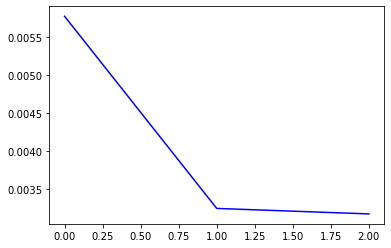

In [228]:
itr_SGD = np.arange(0,I_SGD)
plt.plot(itr_SGD,cost_SGD,'blue')
plt.show()

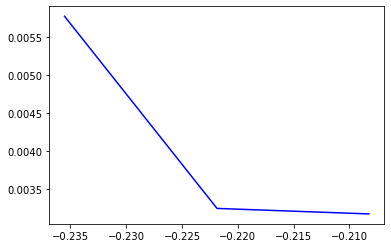

In [229]:
plt.plot(T0_SGD,cost_SGD,'blue')
plt.show()

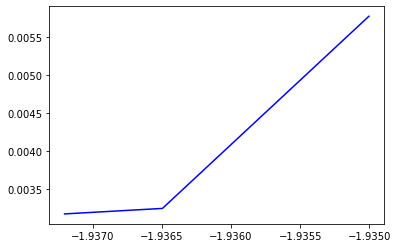

In [230]:
plt.plot(T1_SGD,cost_SGD,'blue')
plt.show()

theta0 =  0.3111552632244645 
 theta1 =  -1.9521629199725297 
 no of itr: 402
Accuracy is:  0.9991086880584111


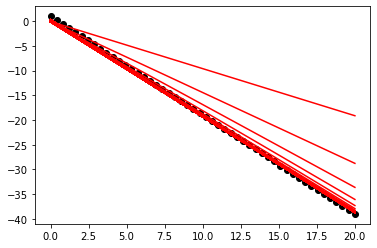

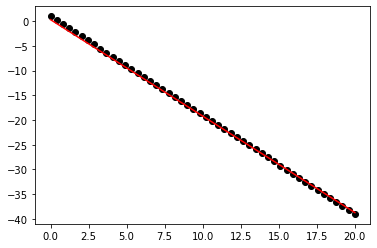

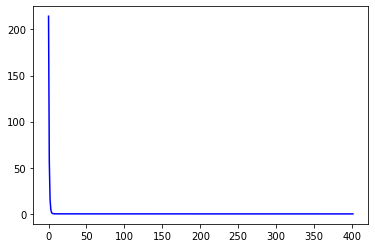

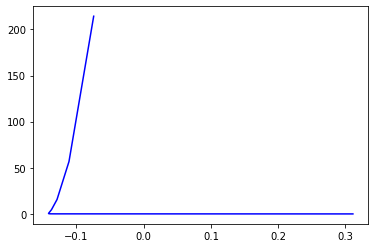

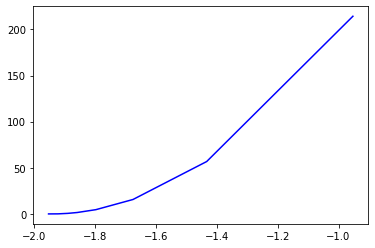

In [231]:
t0_SGD1, t1_SGD1, cost_SGD1, I_SGD1 ,T0_SGD1,T1_SGD1 = S_GD(X,y(X),0.0001,500)
print("theta0 = ",t0_SGD1,"\n","theta1 = ",t1_SGD1,"\n","no of itr:",I_SGD1)

y_SGD1 = t0_SGD1 + t1_SGD1 *  X

from sklearn.metrics import r2_score
print("Accuracy is: ",r2_score(y(X),y_SGD1))

for i in range (len(T0_SGD1)):
    y_SGDI1 = T0_SGD1[i] + T1_SGD1[i] *  X
    plt.plot(X,y_SGDI1,"red")    
plt.scatter(X,y(X),color="black")
plt.show()

fig , SGD1 = plt.subplots()
SGD1.scatter(X,y(X),color="black")
SGD1.plot(X,y_SGD1,color="red")
plt.show()

itr_SGD1 = np.arange(0,I_SGD1)
plt.plot(itr_SGD1,cost_SGD1,'blue')
plt.show()

plt.plot(T0_SGD1,cost_SGD1,'blue')
plt.show()

plt.plot(T1_SGD1,cost_SGD1,'blue')
plt.show()





theta0 =  0.24255091818539432 
 theta1 =  -1.957065126182728 
 no of itr: 75
Accuracy is:  0.9987634371026622


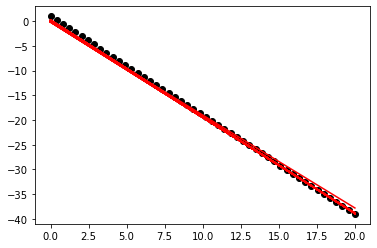

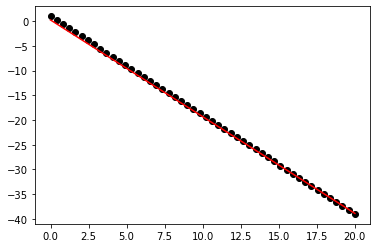

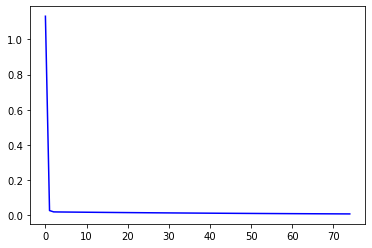

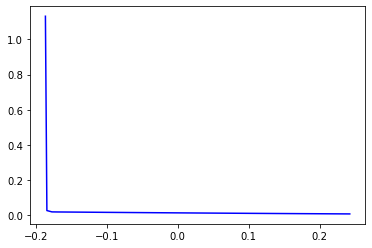

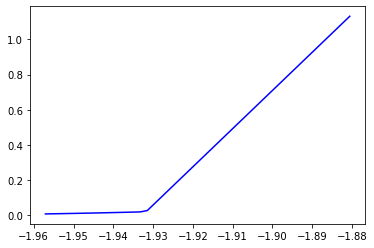

In [232]:
t0_SGD5, t1_SGD5, cost_SGD5, I_SGD5 ,T0_SGD5 ,T1_SGD5 = S_GD(X,y(X),0.0005,500)
print("theta0 = ",t0_SGD5,"\n","theta1 = ",t1_SGD5,"\n","no of itr:",I_SGD5)

y_SGD5 = t0_SGD5 + t1_SGD5 *  X

from sklearn.metrics import r2_score
print("Accuracy is: ",r2_score(y(X),y_SGD5))

for i in range (len(T0_SGD5)):
    y_SGDI5 = T0_SGD5[i] + T1_SGD5[i] *  X
    plt.plot(X,y_SGDI5,"red")    
plt.scatter(X,y(X),color="black")
plt.show()

fig , SGD5 = plt.subplots()
SGD5.scatter(X,y(X),color="black")
SGD5.plot(X,y_SGD5,color="red")
plt.show()

itr_SGD5 = np.arange(0,I_SGD5)
plt.plot(itr_SGD5,cost_SGD5,'blue')
plt.show()

plt.plot(T0_SGD5,cost_SGD5,'blue')
plt.show()

plt.plot(T1_SGD5,cost_SGD5,'blue')
plt.show()


#Test

In [23]:
def GDS(x_ins,y_ops,alphas,max_itrs):
    t0 = 0
    t1 = 0
    m = len(x_ins)
    itr = 0
    cost_all = []
    T_0E = []
    T_1E = []
    
    #h = t0 + t1 *  x_ins
    h_i =0
    #G_0 = h[0] - y_ops[0]
    #G_1 = h[0] - y_ops[0] * x_ins[0]

    
    for j in range (max_itrs):
        for i in range(m):
                h_i = t0 + t1*x_ins[i]
                #cost_t = 0.5*((h_i - y_op[i])**2)
                #cost_all_t.append(cost)
                GI_0= (h_i - y_ops[i])
                GI_1 = ((h_i - y_ops[i]) * x_ins[i]) 
                             
                t0_n = t0 - alphas * GI_0
                t1_n = t1 - alphas * GI_1
                t0 = t0_n
                t1 = t1_n
    
        h = t0 + t1*x_ins
        cost = 0.5*((h - y_ops)**2)
        cost_all.append(cost)
        T_0E.append(t0)
        T_1E.append(t1)
        itr += 1
 
        
        
    return t0 , t1 , cost_all , itr , T_0E , T_1E

t0_S, t1_S, cost_S, I_S , T_0S,T_1S = GDS(X,y(X),0.0001,50)
print("theta0 = ",t0_S,"\n","theta1 = ",t1_S,"\n","no of itr:",I_S)
print(len(cost_S))

theta0 =  -0.08130226251955557 
 theta1 =  -1.9249085605151546 
 no of itr: 50
50


In [24]:
h_n = t0_S + t1_S *  X
print(h_n)

[ -0.08130226  -0.86697923  -1.65265619  -2.43833315  -3.22401012
  -4.00968708  -4.79536404  -5.58104101  -6.36671797  -7.15239493
  -7.9380719   -8.72374886  -9.50942582 -10.29510279 -11.08077975
 -11.86645671 -12.65213368 -13.43781064 -14.22348761 -15.00916457
 -15.79484153 -16.5805185  -17.36619546 -18.15187242 -18.93754939
 -19.72322635 -20.50890331 -21.29458028 -22.08025724 -22.8659342
 -23.65161117 -24.43728813 -25.22296509 -26.00864206 -26.79431902
 -27.57999598 -28.36567295 -29.15134991 -29.93702687 -30.72270384
 -31.5083808  -32.29405777 -33.07973473 -33.86541169 -34.65108866
 -35.43676562 -36.22244258 -37.00811955 -37.79379651 -38.57947347]


In [25]:
from sklearn.metrics import r2_score
print(r2_score(y(X),h_n))

0.9978037526037133


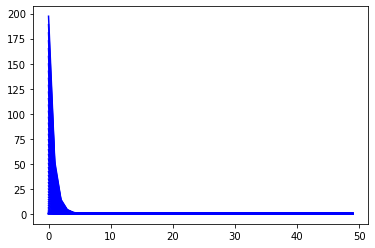

In [26]:
itraS = np.arange(0,I_S)
plt.plot(itraS,cost_S,"blue")
plt.show()

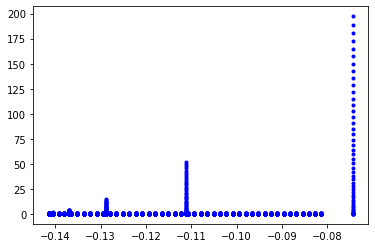

In [77]:
plt.plot(T_0S,cost_S,'b.')
plt.show()

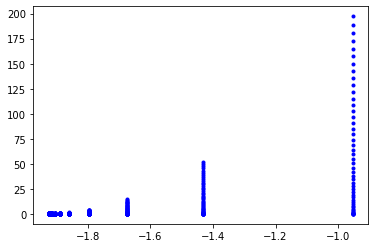

In [69]:
plt.plot(T_1S,cost_S,'b.')
plt.show()

In [28]:
def GDS_ST(x_in,y_op,alpha,max_itr):
    t0 = 0
    t1 = 0
    m = len(x_in)
    itr = 0
    cost_all = []
    T0_SST = []
    T1_SST = []
    
    h = t0 + t1 *  x_in
    h_i =0
    G_0 = h[0] - y_op[0]
    G_1 = h[0] - y_op[0] * x_in[0]
    norm = np.linalg.norm([G_0,G_1])
    
    
    while norm >= 0.0001 :
        if itr>=max_itr:
                break
        else:    
            for i in range(m):
                h_i = t0 + t1*x_in[i]
                #cost = 0.5*((h_i - y_op[i])**2)
                #cost_all.append(cost)
                GI_0= (h_i - y_op[i])
                GI_1 =((h_i - y_op[i]) * x_in[i]) 
                #norm = np.linalg.norm([GI_0,GI_1])                
                t0_n = t0 - alpha*GI_0
                t1_n = t1 - alpha*GI_1
                t0 = t0_n
                t1 = t1_n
            T0_SST.append(t0)
            T1_SST.append(t1)
            norm = np.linalg.norm([GI_0,GI_1])
            h = t0 + t1*x_in
            cost = 0.5*((h - y_op)**2)
            cost_all.append(cost)
            itr += 1
 
        
        
    return t0 , t1 , cost_all , itr,T0_SST,T1_SST

t0_SST, t1_SST, cost_SST, ISST ,T0_SST,T1_SST = GDS_ST(X,y(X),0.0001,1000)
print("theta0 = ",t0_SST,"\n","theta1 = ",t1_SST,"no of itr:",ISST)
print(len(cost_SST))

theta0 =  0.6797861815752366 
 theta1 =  -1.9777626317802888 no of itr: 1000
1000


In [29]:
h_nS = t0_SST + t1_SST *  X
print(h_nS)

[  0.67978618  -0.12746387  -0.93471393  -1.74196398  -2.54921403
  -3.35646409  -4.16371414  -4.97096419  -5.77821425  -6.5854643
  -7.39271436  -8.19996441  -9.00721446  -9.81446452 -10.62171457
 -11.42896463 -12.23621468 -13.04346473 -13.85071479 -14.65796484
 -15.46521489 -16.27246495 -17.079715   -17.88696506 -18.69421511
 -19.50146516 -20.30871522 -21.11596527 -21.92321532 -22.73046538
 -23.53771543 -24.34496549 -25.15221554 -25.95946559 -26.76671565
 -27.5739657  -28.38121575 -29.18846581 -29.99571586 -30.80296592
 -31.61021597 -32.41746602 -33.22471608 -34.03196613 -34.83921619
 -35.64646624 -36.45371629 -37.26096635 -38.0682164  -38.87546645]


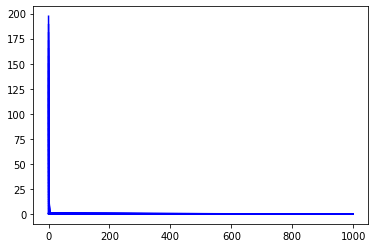

In [30]:
itra_ST = np.arange(0,ISST)
plt.plot(itra_ST,cost_SST,"blue")
plt.show()

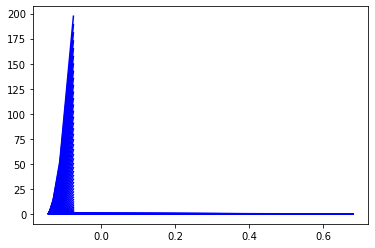

In [99]:
plt.plot(T0_SST,cost_SST,'blue')
plt.show()

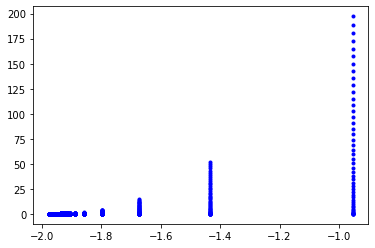

In [101]:
plt.plot(T1_SST,cost_SST,'b.')
plt.show()

In [33]:
def GDST(x_in,y_op,alpha,max_itr):
    t0 = 0
    t1 = 0
    m = len(x_in)
    itr = 0
    cost_all = []
    T_0E = []
    T_1E = []
    
    h = t0 + t1 *  x_in
    h_i =0
    G_0 = h[0] - y_op[0]
    G_1 = h[0] - y_op[0] * x_in[0]

    
    for j in range (max_itr):
        for i in range(m):
            T_0E.append(t0)
            T_1E.append(t1)
            h_i = t0 + t1*x_in[i]
            cost = 0.5*((h_i - y_op[i])**2)
            cost_all.append(cost)
            GI_0= (h_i - y_op[i])
            GI_1 = ((h_i - y_op[i]) * x_in[i])                           
            t0_n = t0 - alpha * GI_0
            t1_n = t1 - alpha * GI_1
            t0 = t0_n
            t1 = t1_n
            #T_0E.append(t0)
            #T_1E.append(t1)
    
        #h = t0 + t1*x_in
        #cost = 0.5*((h - y_op)**2)
        #cost_all.append(cost)
        #T_0E.append(t0)
        #T_1E.append(t1)
            itr += 1
 
        
        
    return t0 , t1 , cost_all , itr , T_0E , T_1E

t0_ST, t1_ST, cost_ST, I_ST , T_0ST,T_1ST = GDST(X,y(X),0.0001,50)
print("theta0 = ",t0_ST,"\n","theta1 = ",t1_ST,"\n","no of itr:",I_ST)
print(len(cost_ST))
print(len(T_0ST))

theta0 =  -0.08130226251955557 
 theta1 =  -1.9249085605151546 
 no of itr: 2500
2500
2500


In [21]:
h_nST = t0_ST + t1_ST *  X
print(h_nST)

[ -0.08130226  -0.86697923  -1.65265619  -2.43833315  -3.22401012
  -4.00968708  -4.79536404  -5.58104101  -6.36671797  -7.15239493
  -7.9380719   -8.72374886  -9.50942582 -10.29510279 -11.08077975
 -11.86645671 -12.65213368 -13.43781064 -14.22348761 -15.00916457
 -15.79484153 -16.5805185  -17.36619546 -18.15187242 -18.93754939
 -19.72322635 -20.50890331 -21.29458028 -22.08025724 -22.8659342
 -23.65161117 -24.43728813 -25.22296509 -26.00864206 -26.79431902
 -27.57999598 -28.36567295 -29.15134991 -29.93702687 -30.72270384
 -31.5083808  -32.29405777 -33.07973473 -33.86541169 -34.65108866
 -35.43676562 -36.22244258 -37.00811955 -37.79379651 -38.57947347]


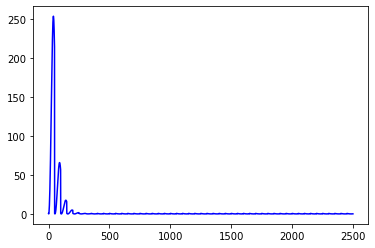

In [40]:
itraST = np.arange(0,I_ST)
plt.plot(itraST,cost_ST,'blue')
plt.show()

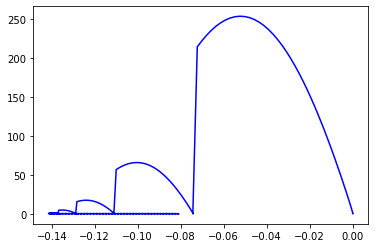

In [75]:
plt.plot(T_0ST,cost_ST,'blue')
plt.show()

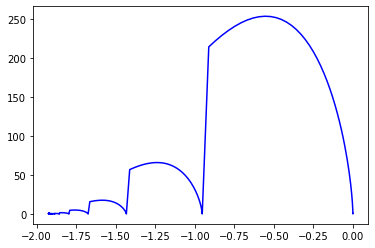

In [74]:
plt.plot(T_1ST,cost_ST,'blue')
plt.show()